In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import getcwd
import numpy as np
from importlib import reload
from sklearn.metrics import silhouette_score #  library to Silhouette Coefficient

In [2]:
from sklearn.mixture import GaussianMixture

In [3]:
import utils
reload(utils)

Using TensorFlow backend.


<module 'utils' from 'C:\\Users\\Smit\\ds5230_2020_project\\utils.py'>

In [4]:
PROJECT_PATH = getcwd()
PICKLE_PATH = PROJECT_PATH + "\\pickles\\"

# Loading Train Images

In [5]:
train_images = utils.open_pickle(file = PICKLE_PATH + "train_images" )

In [6]:
IMG_DIMENSION = train_images[0].shape
IMG_DIMENSION

(80, 60, 3)

In [7]:
# flattening image
train_images = train_images.reshape((train_images.shape[0], IMG_DIMENSION[0]*IMG_DIMENSION[1]*IMG_DIMENSION[2]))
train_images = train_images/255.0 # normalizing image

In [8]:
print("Total images: %d"%train_images.shape[0])
print("Dimension of image before PCA Transformation: %d"%train_images.shape[1])

Total images: 10796
Dimension of image before PCA Transformation: 14400


# Loading PCA object and taking PCA transformation

In [9]:
optimal_metrics = utils.open_pickle(PICKLE_PATH + "optimal_metrics")
MAX_PCA_COMPONENTS = optimal_metrics['MAX_PCA_COMPONENTS']
pca_fit = utils.open_pickle(PICKLE_PATH + "pca_fit_"  + str(MAX_PCA_COMPONENTS) + '_components')

In [10]:
# taking PCA transformation
train_images = pca_fit.transform(train_images)

In [11]:
print("Dimension of image after PCA Transformation: %d"%train_images.shape[1])

Dimension of image after PCA Transformation: 145


# Performing GMM on PCA tranformed images

In [12]:
%%time
n_cluster_list = [i for i in range(8,17)]
gmms_fit = {}
for clusters in n_cluster_list:
    start_time = utils.get_time()
    print("---Fitting GMM with %d clusters---"%clusters)
    gmm = GaussianMixture(n_components =  clusters,  
                    random_state = 40)
    gmms_fit[clusters] = gmm.fit(train_images)
    time = utils.get_time() - start_time
    print("Time taken: %s minutes" %round(time.seconds/60,2))

---Fitting GMM with 8 clusters---
Time taken: 0.45 minutes
---Fitting GMM with 9 clusters---
Time taken: 0.42 minutes
---Fitting GMM with 10 clusters---
Time taken: 0.58 minutes
---Fitting GMM with 11 clusters---
Time taken: 0.47 minutes
---Fitting GMM with 12 clusters---
Time taken: 0.63 minutes
---Fitting GMM with 13 clusters---
Time taken: 0.7 minutes
---Fitting GMM with 14 clusters---
Time taken: 0.75 minutes
---Fitting GMM with 15 clusters---
Time taken: 0.57 minutes
---Fitting GMM with 16 clusters---
Time taken: 0.48 minutes
Wall time: 5min 7s


## Calculating Silhouette Score for all values of clusters

In [16]:
%%time
gmm_ss = {}
for clusters in n_cluster_list:
    print("----- Calcualting Silhouette score with %d clusters (GMM)"%clusters)
    gmm_ss[clusters] = silhouette_score(train_images, labels=gmms_fit[clusters].predict(train_images))

----- Calcualting Silhouette score with 8 clusters (GMM)
----- Calcualting Silhouette score with 9 clusters (GMM)
----- Calcualting Silhouette score with 10 clusters (GMM)
----- Calcualting Silhouette score with 11 clusters (GMM)
----- Calcualting Silhouette score with 12 clusters (GMM)
----- Calcualting Silhouette score with 13 clusters (GMM)
----- Calcualting Silhouette score with 14 clusters (GMM)
----- Calcualting Silhouette score with 15 clusters (GMM)
----- Calcualting Silhouette score with 16 clusters (GMM)
Wall time: 34.5 s


Text(0, 0.5, 'Silhouette Cofficient')

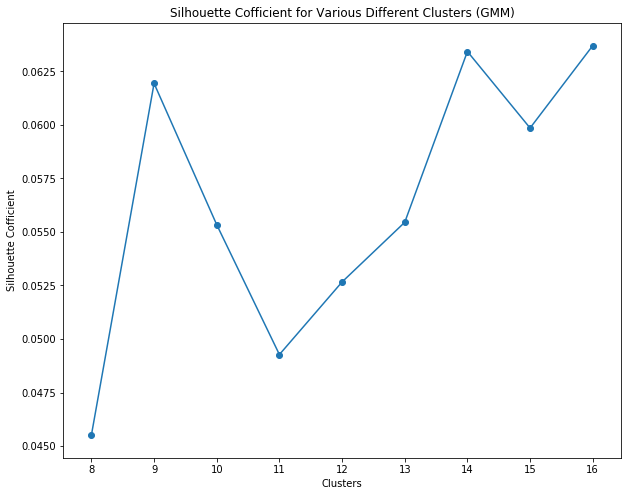

In [18]:
# for components in n_components_list:
#     print('Silhouette Cofficient for %d clusters GMM: %f'%(components, gmm_ss[components]))
    
plt.figure(figsize=(10,8))
plt.plot(n_cluster_list, [v for k, v in gmm_ss.items()])
plt.scatter(n_cluster_list, [v for k, v in gmm_ss.items()])
plt.title("Silhouette Cofficient for Various Different Clusters (GMM)")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Cofficient")

# Saving GMM fit

In [19]:
N_CLUSTERS = 12
utils.save_pickle(PICKLE_PATH + "GMM_PCA_%scomponents_%sclusters"%(str(MAX_PCA_COMPONENTS),str(N_CLUSTERS)), 
                  gmms_fit[N_CLUSTERS])

Variable successfully saved in C:\Users\Smit\ds5230_2020_project\pickles\GMM_PCA_145components_12clusters.pickle


In [20]:
try:
    optimal_metrics = utils.open_pickle(PICKLE_PATH + "optimal_metrics")
except: 
    optimal_metrics = {'GMM_CLUSTERS': N_CLUSTERS}
    
optimal_metrics['GMM_CLUSTERS'] = N_CLUSTERS
utils.save_pickle(PICKLE_PATH + "optimal_metrics", optimal_metrics)

Variable successfully saved in C:\Users\Smit\ds5230_2020_project\pickles\optimal_metrics.pickle
